In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [49]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... month  day  hour  \
0                561 Perry Cove  Moravian Falls  ...     1    1     0   
1  43039 Riley Greens Suite 393          Orient  ...     1    1     0   
2      594 White Dale Suite 530      Malad City  ...     1    1     0   
3   9443 Cynthia Court Apt. 038         Boulder  ...     1    1     0   
4              408 Bradley Rest        Doe Hill  ...     1    1     0   

   time_diff  is_peak_hour    distance   z_score   log_amt  starting_digits  \
0        0.0             0   78.597680  0.407826  1.786747           270318   
1        0.0             0   30.212218  0.230039  4.684259           630423   
2        0.0             0  108.206235  0.934149  5.398660           388594   
3        0.0             0   95.673366  0.158132  3.828641           353409   
4        0.0             0   77.556853  0.177094  3.760269           375534   

          card_type  
0        Mastercard  
1     Regional Card  
2  American Express  
3  American Express  
4  American Express  

[5 rows x 33 columns]

In [56]:
def get_card_type(cc_number):
    starting_digits = str(cc_number)[:1]  # Extract the first digit
    if starting_digits in ['2', '5']:
        return 'Mastercard'
    elif starting_digits == '4':
        return 'Visa'
    elif starting_digits == '3':
        return 'American Express'
    elif starting_digits == '6':
        return 'Regional Card'
    elif starting_digits == '1':
        return 'Maestro Card'
    else:
        return 'Unknown'

# Apply the function to create a new column 'card_type'
df['card_type'] = df['cc_num'].apply(get_card_type)

# Show the updated DataFrame with the card types
print(df[['cc_num', 'card_type']])


                      cc_num         card_type
0           2703186189652095        Mastercard
1               630423337322     Regional Card
2             38859492057661  American Express
3           3534093764340240  American Express
4            375534208663984  American Express
...                      ...               ...
1296670       30263540414123  American Express
1296671     6011149206456997     Regional Card
1296672     3514865930894695  American Express
1296673     2720012583106919        Mastercard
1296674  4292902571056973207              Visa

[1296675 rows x 2 columns]


In [58]:
df[df['card_type'] == 'Unknown']['cc_num']

Series([], Name: cc_num, dtype: int64)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [148]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
year                     0
month                    0
day                      0
hour                     0
time_diff                0
is_peak_hour             0
distance                 0
z_score                  0
log_amt                  0
starting_digits          0
card_type                0
age                      0
age_group                0
date                     0
trans_date               0
d

In [7]:


# # Drop 'Unnamed: 0' (index column)
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.describe()


cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00

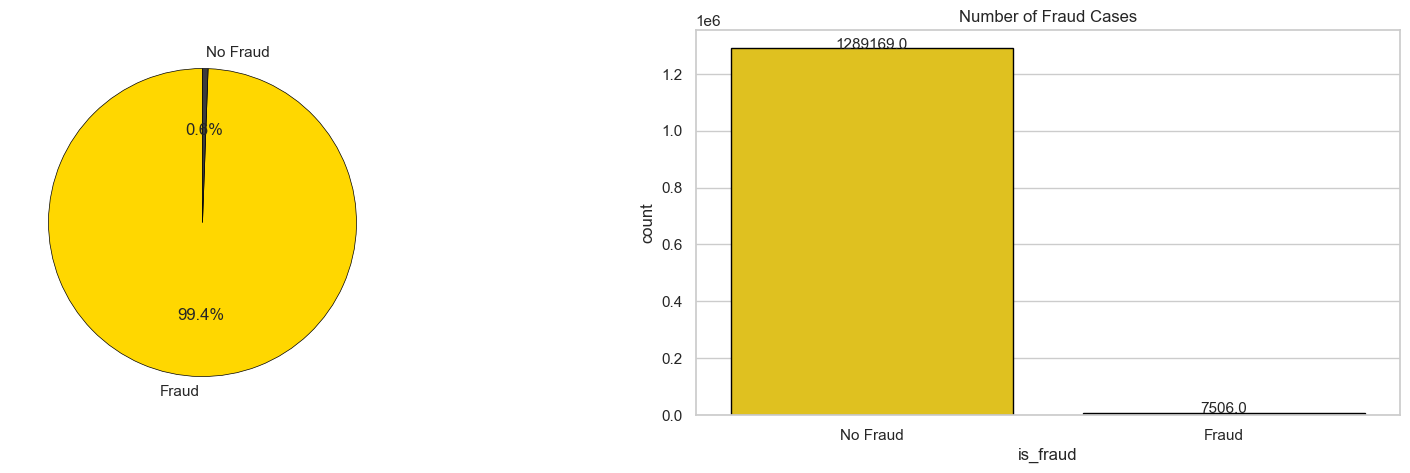

In [178]:
colors = ['#FFD700','#3B3B3C']
fraud = len(df[df['is_fraud'] == 1]) / len(df) * 100
nofraud = len(df[df['is_fraud'] == 0]) / len(df) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 0.5,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x ='is_fraud', data=df,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center',
            fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

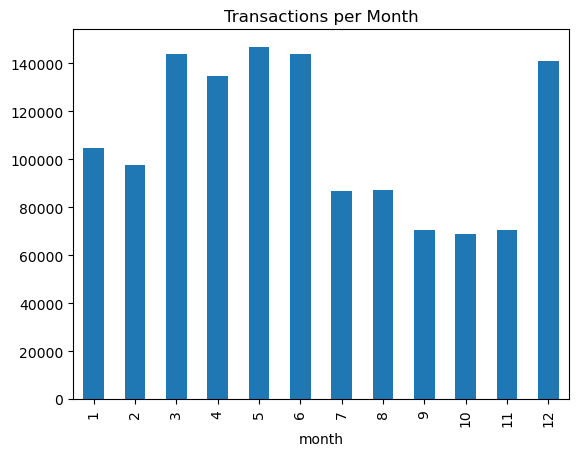

In [24]:
# Time-based Features

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour

# Plot transaction counts per month
df.groupby('month').size().plot(kind='bar', title='Transactions per Month')
plt.show()


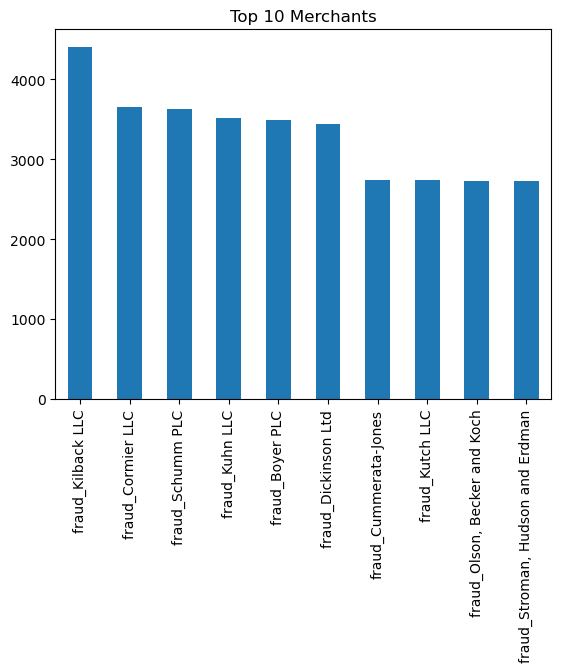

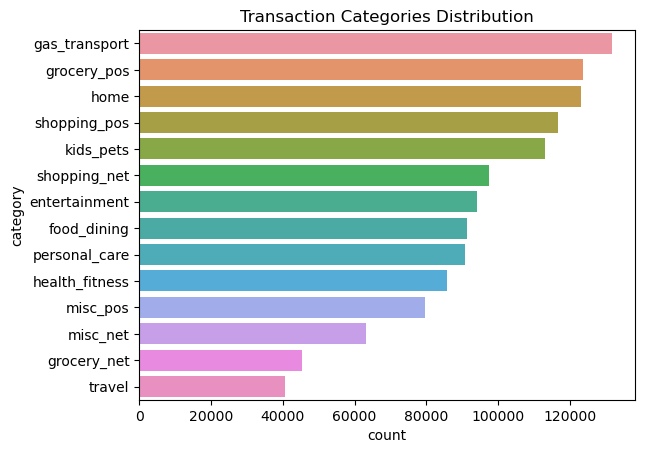

In [25]:
# Check the distribution of merchant, category, state, gender, etc.

# Distribution of merchants
df['merchant'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Merchants')
plt.show()

# Distribution of transaction categories
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Transaction Categories Distribution')
plt.show()


#### 1. Merchant Risk Profiling

-    Objective: The merchants in the top 10 list should be considered higher risk for fraudulent transactions. They may need further scrutiny, internal audits, or even customer alerts.
-    Action: Identify patterns in these merchants' transactions, such as high transaction amounts, certain times of day, or specific transaction categories, and flag those behaviors as potential fraud indicators in future transactions.

#### 2. Fraud Prevention Strategy

-    Objective: Build a prevention strategy that focuses on high-risk merchants. This could include:
        Implementing more stringent verification checks for transactions associated with these merchants.-
        Applying real-time fraud detection models to transactions involving these merchants.
-    Action: Collaborate with these merchants to understand if there are vulnerabilities on their end, such as compromised payment systems or fraudulent employees.

#### 3. Enhanced Fraud Detection

-    Objective: Feature engineering and adding a binary variable (like is_top_merchant) to identify whether a transaction involves one of these top merchants can improve your fraud detection model.
-    Action:
        Create a binary feature for your machine learning model that indicates if the transaction belongs to one of these top merchants. This could enhance the model's performance, particularly in predicting fraud.

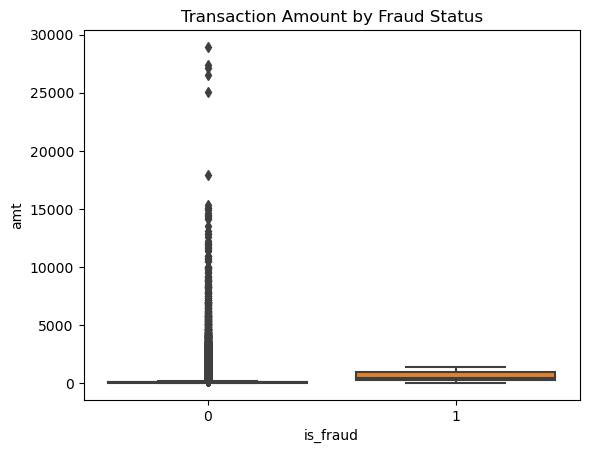

In [26]:
# 3. Bivariate Analysis
# 3.1. Transaction Amount (amt) vs Fraud

# Compare the distribution of transaction amounts between fraudulent and non-fraudulent transactions:

sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()


In [14]:
# Geographic Analysis

# Check the relationship between geographical coordinates and fraud.

In [149]:
import json 
import plotly.express as px
import plotly.io as pio


pio.renderers.default = 'notebook'
with open('us-states.json') as f:
    geojson_data = json.load(f)

fraud_by_state = df[df['is_fraud'] == 1].groupby('state').agg(
    fraud_amount=('amt', 'sum'),
    num_frauds=('is_fraud', 'count')
).reset_index()
fraud_by_state['rank'] = fraud_by_state['fraud_amount'].rank(ascending=False).astype(int)
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    fraud_by_state,
    locations='state',
    locationmode="USA-states",
    color='fraud_amount',
    hover_name='state',  # Full state name for hover
    hover_data={
        'fraud_amount': ':,.2f',  # Fraud amount formatted to 2 decimal places
        'rank': True,  # Show rank in hover
        'num_frauds': True  # Show number of fraudulent transactions in hover
    },
    color_continuous_scale="Reds",
    scope="usa",
    title="Fraudulent Transactions by State"
)

# hover template 
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Fraud Amount: $%{customdata[0]:,.2f}<br>" +
                  "Rank: %{customdata[1]}<br>" +
                  "Number of Frauds: %{customdata[2]}<extra></extra>",
    customdata=fraud_by_state[['fraud_amount', 'rank', 'num_frauds']].values
)


fig.show()

In [16]:
# Correlation Heatmap

# Examine the correlation between numerical variables:

C:\Users\goura\AppData\Local\Temp\ipykernel_19524\1246563147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


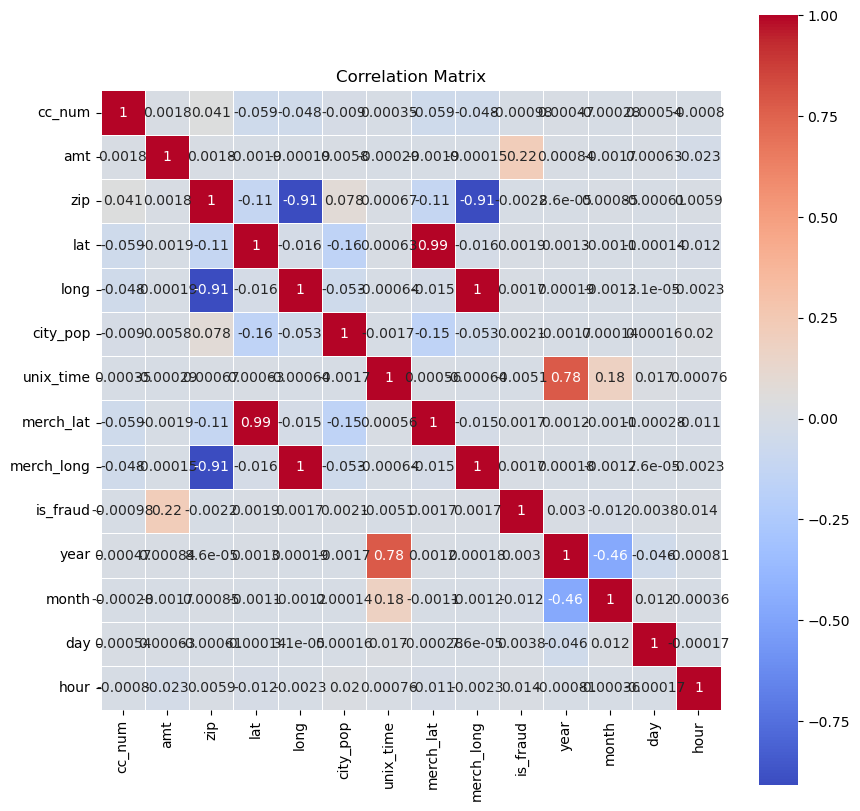

In [17]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, square = True)
plt.title('Correlation Matrix')
plt.show()


In [18]:
# df.pairplot()

In [20]:
# 4. Statistical Tests
# 4.1. Chi-Square Test for Categorical Features

# Test whether categorical variables like merchant, category, and gender are associated with is_fraud.

In [27]:
from scipy.stats import chi2_contingency

# Example for 'category' feature
contingency_table = pd.crosstab(df['category'], df['is_fraud'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print('Category is significantly related to fraud')
else:
    print('No significant relationship between category and fraud')


Category is significantly related to fraud


### 4.2. T-Test for Transaction Amounts

Test if the means of transaction amounts are different between fraud and non-fraud transactions.

In [28]:
from scipy.stats import ttest_ind

fraud_amt = df[df['is_fraud'] == 1]['amt']
non_fraud_amt = df[df['is_fraud'] == 0]['amt']
t_stat, p_value = ttest_ind(fraud_amt, non_fraud_amt)

if p_value < 0.05:
    print('Significant difference in transaction amounts between fraud and non-fraud')
else:
    print('No significant difference in transaction amounts')


Significant difference in transaction amounts between fraud and non-fraud


### Time Features

Create time-based features such as the time difference between transactions and peak hours:

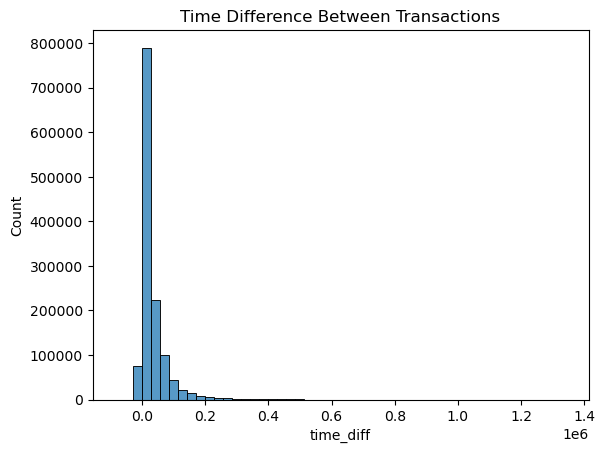

In [29]:
df['time_diff'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if x in [8, 9, 17, 18] else 0)

# Time difference between transactions
sns.histplot(df['time_diff'], bins=50)
plt.title('Time Difference Between Transactions')
plt.show()


### 5.2. Distance Between Customer and Merchant

Calculate the haversine distance between customer and merchant locations:

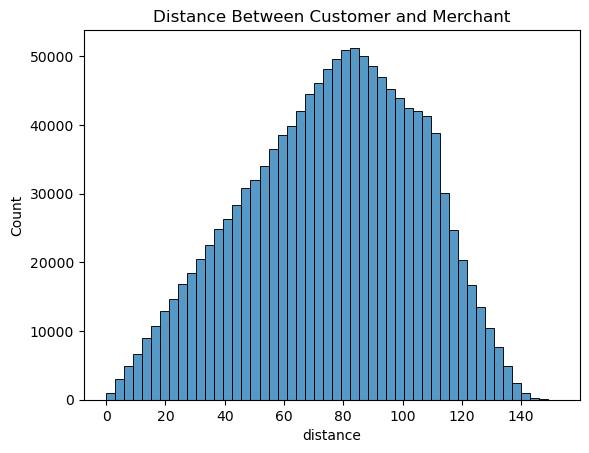

In [30]:
from geopy.distance import great_circle

def haversine_distance(row):
    cust_coords = (row['lat'], row['long'])
    merch_coords = (row['merch_lat'], row['merch_long'])
    return great_circle(cust_coords, merch_coords).km

df['distance'] = df.apply(haversine_distance, axis=1)

# Plot the distance
sns.histplot(df['distance'], bins=50)
plt.title('Distance Between Customer and Merchant')
plt.show()


### 7. Advanced Visualization Techniques

Use pairplots, violin plots, and other advanced techniques to visualize the relationship between features:

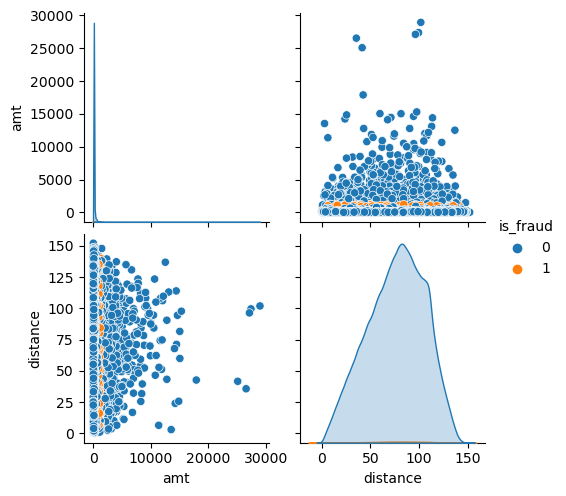

In [31]:
# Pairplot for selected features
sns.pairplot(df[['amt', 'distance', 'is_fraud', 'category']], hue='is_fraud')
plt.show()

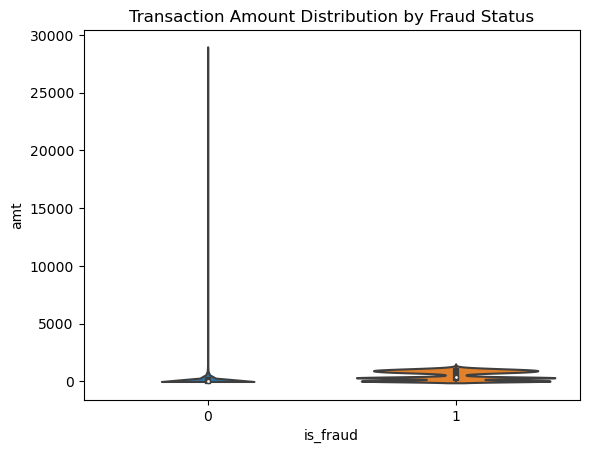

In [32]:
# Violin plot to compare distributions
sns.violinplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

In [33]:
# Calculate IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
non_outliers = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

print(f"Number of outliers: {len(outliers)}")


Number of outliers: 67290


In [34]:
from scipy import stats
import numpy as np

# Calculate Z-scores
df['z_score'] = np.abs(stats.zscore(df['amt']))

# Define a threshold to classify points as outliers (e.g., 3 standard deviations away from the mean)
outliers_z = df[df['z_score'] > 3]

print(f"Number of outliers based on Z-score: {len(outliers_z)}")


Number of outliers based on Z-score: 12738


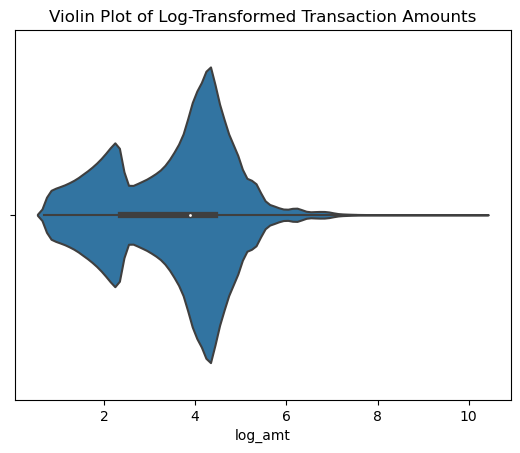

In [35]:
# Apply log transformation (add 1 to avoid log(0))
df['log_amt'] = np.log(df['amt'] + 1)

# Replot after transformation
sns.violinplot(x=df['log_amt'])
plt.title('Violin Plot of Log-Transformed Transaction Amounts')
plt.show()


#### Percentage or Reliability Score of Each Merchant



In [61]:
merchant_stats = df.groupby('merchant').agg(
    total_transactions=('is_fraud', 'size'),
    total_frauds=('is_fraud', 'sum')
)
merchant_stats['fraud_percentage'] = (merchant_stats['total_frauds'] / merchant_stats['total_transactions']) * 100
merchant_stats['reliability_score'] = 100 - merchant_stats['fraud_percentage']
print(merchant_stats[['fraud_percentage', 'reliability_score']])

                                  fraud_percentage  reliability_score
merchant                                                             
fraud_Abbott-Rogahn                       0.162690          99.837310
fraud_Abbott-Steuber                      0.340329          99.659671
fraud_Abernathy and Sons                  0.228441          99.771559
fraud_Abshire PLC                         0.474934          99.525066
fraud_Adams, Kovacek and Kuhlman          0.425532          99.574468
...                                            ...                ...
fraud_Zemlak Group                        1.310717          98.689283
fraud_Zemlak, Tillman and Cremin          0.110865          99.889135
fraud_Ziemann-Waters                      0.353982          99.646018
fraud_Zieme, Bode and Dooley              0.312500          99.687500
fraud_Zulauf LLC                          0.112170          99.887830

[693 rows x 2 columns]


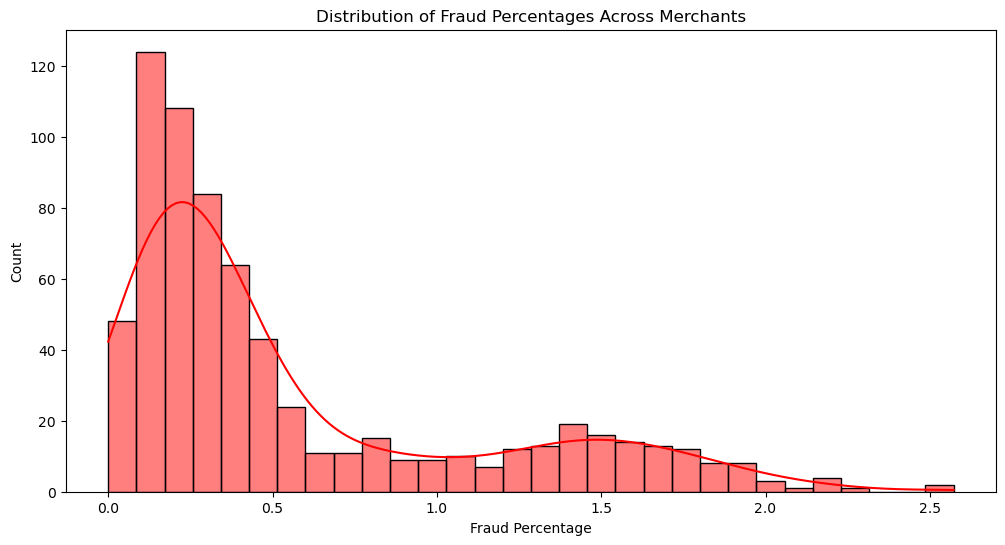

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(merchant_stats['fraud_percentage'], bins=30, kde=True, color='red')
plt.xlabel('Fraud Percentage')
plt.title('Distribution of Fraud Percentages Across Merchants')
plt.show()


### 2. Age Group Most Likely to Get Fraud

Determine which age group is most likely to be involved in fraud.

In [66]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = pd.to_datetime('today').year - df['dob'].dt.year

# Define age groups
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calculate fraud percentage by age group
age_fraud_stats = df.groupby('age_group').agg(
    total_transactions=('is_fraud', 'size'),
    total_frauds=('is_fraud', 'sum')
)
age_fraud_stats['fraud_percentage'] = (age_fraud_stats['total_frauds'] / age_fraud_stats['total_transactions']) * 100
print(age_fraud_stats[['fraud_percentage']])

           fraud_percentage
age_group                  
<18                     NaN
18-30              0.614339
30-40              0.470573
40-50              0.452190
50-60              0.577713
60+                0.757765


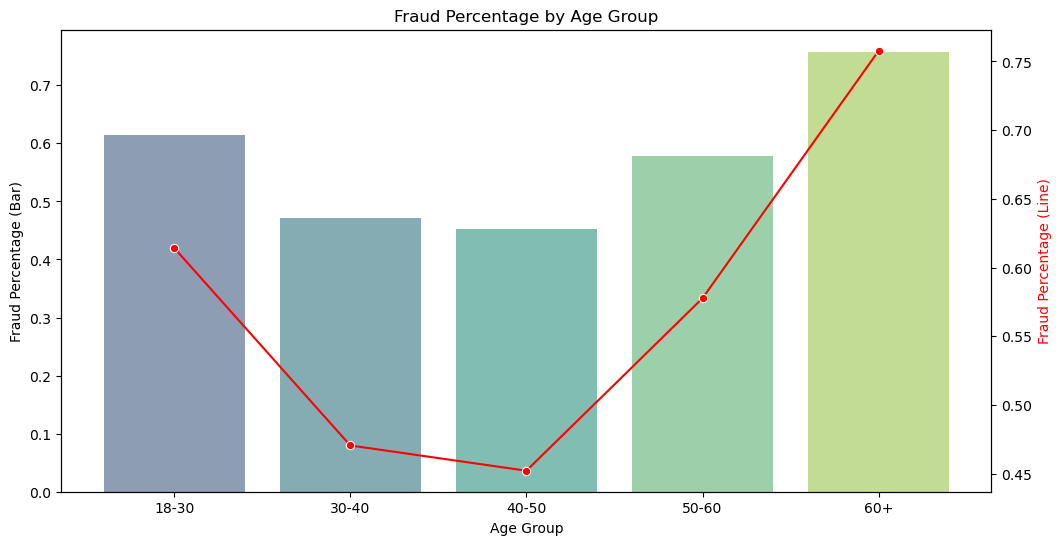

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data is cleaned
age_fraud_stats = age_fraud_stats.dropna(subset=['fraud_percentage'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart for fraud percentage
sns.barplot(x=age_fraud_stats.index, y='fraud_percentage', data=age_fraud_stats, palette='viridis', ax=ax1, alpha=0.6)

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot line chart on the secondary y-axis
sns.lineplot(x=age_fraud_stats.index, y='fraud_percentage', data=age_fraud_stats, color='red', marker='o', ax=ax2)

# Set labels and titles
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Fraud Percentage (Bar)', color='black')
ax2.set_ylabel('Fraud Percentage (Line)', color='red')
ax1.set_title('Fraud Percentage by Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### 3. Time Period Most Frauds Occur

Analyze the time of the day when frauds are most common.

In [76]:
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
fraud_by_hour = df[df['is_fraud'] == 1].groupby('hour').size()


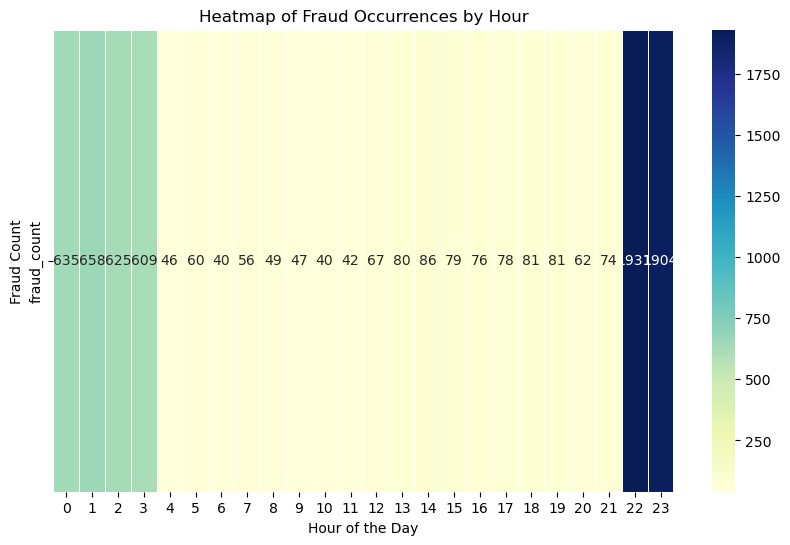

In [72]:

# Prepare data for heatmap
heatmap_data = df[df['is_fraud'] == 1].groupby('hour').size().reindex(range(24), fill_value=0).to_frame(name='fraud_count')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True, annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Count')
plt.title('Heatmap of Fraud Occurrences by Hour')
plt.show()


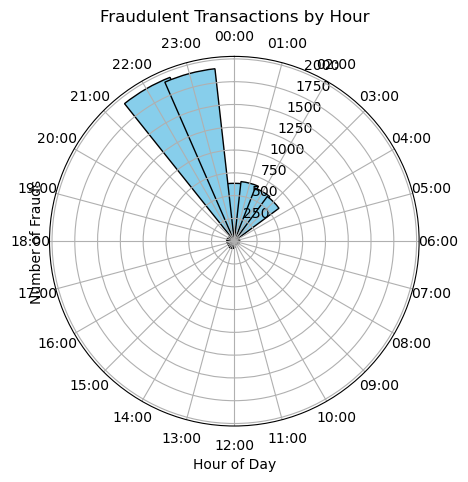

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hours = np.arange(0, 24)
fraud_counts = [635, 658, 625, 609, 46, 60, 40, 56, 49, 47, 40, 42, 67, 80, 86, 79, 76, 78, 81, 81, 62, 74, 1931, 1904]

# Convert hours to radians
theta = np.deg2rad(hours * 15)

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot data
bars = ax.bar(theta, fraud_counts, width=0.3, color='skyblue', edgecolor='black')

# Rotate the plot
ax.set_theta_zero_location('N')  # Set 0 degrees to the top
ax.set_theta_direction(-1)       # Set direction to anticlockwise

# Customize the ticks
ax.set_xticks(theta)  # Set ticks at each hour
ax.set_xticklabels([f'{h:02d}:00' for h in hours])  # Set time labels

# Additional formatting
ax.set_title('Fraudulent Transactions by Hour')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Frauds')

plt.show()


### 4. Increase or Decrease in Frauds Over the Months

To analyze trends over time, use month extracted from the transaction date.

In [145]:
df['year'] = pd.to_datetime(df['trans_date_trans_time']).dt.year
df['month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month

fraud_by_year = df[df['is_fraud'] == 1].groupby('year').size()
fraud_by_month = df[df['is_fraud'] == 1].groupby('month').size()


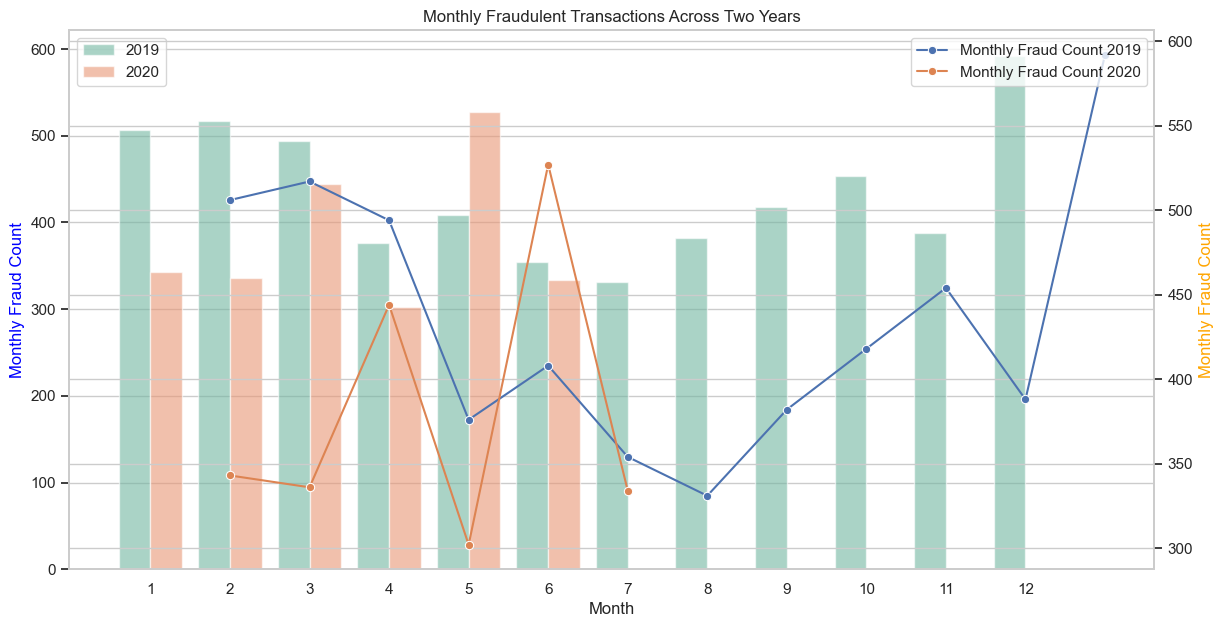

In [146]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the bar plot for monthly fraud counts with faded color
sns.barplot(x='month', y='fraud_count_month', hue='year', data=fraud_by_month, ax=ax1, palette='Set2', alpha=0.6)

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Plotting the line plot for monthly fraud counts
for year in fraud_by_month['year'].unique():
    yearly_monthly_data = fraud_by_month[fraud_by_month['year'] == year]
    sns.lineplot(x='month', y='fraud_count_month', data=yearly_monthly_data, ax=ax2, label=f'Monthly Fraud Count {year}', marker='o')

# Add labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Monthly Fraud Count', color='blue')
ax2.set_ylabel('Monthly Fraud Count', color='orange')
ax1.set_title('Monthly Fraudulent Transactions Across Two Years')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

### 5. Fraud Likelihood by Transaction Amount

Analyze the distribution of frauds by transaction amount.

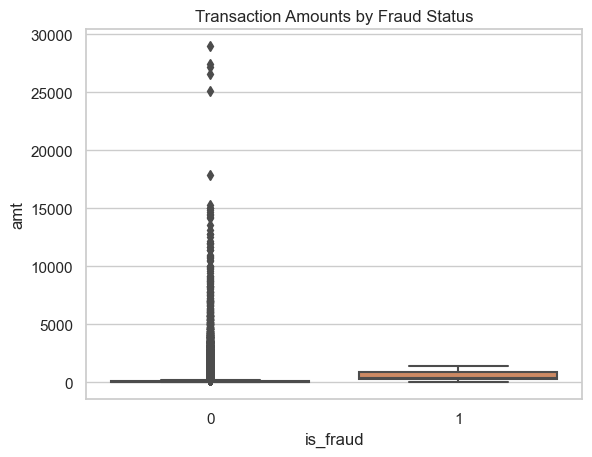

In [83]:
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.show()


### 8. Distribution of Transaction Values

Compare transaction values of fraud and non-fraud transactions.

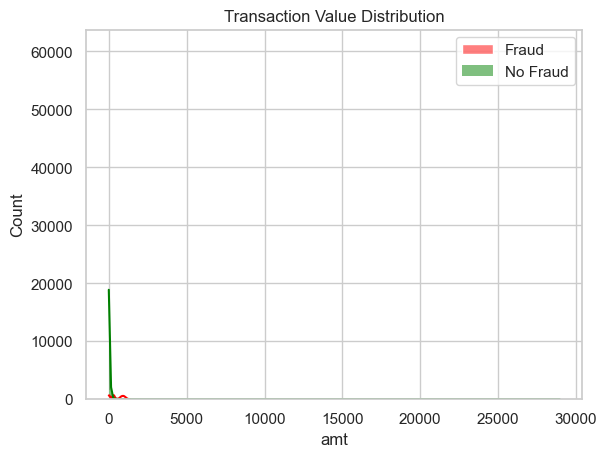

In [85]:
sns.histplot(df[df['is_fraud'] == 1]['amt'], color='red', label='Fraud', kde=True)
sns.histplot(df[df['is_fraud'] == 0]['amt'], color='green', label='No Fraud', kde=True)
plt.legend()
plt.title('Transaction Value Distribution')
plt.show()


### 9. Predominant Fraudulent Products

Analyze which products are most commonly associated with fraud.

In [158]:
fraud_by_product = df[df['is_fraud'] == 1]['category'].value_counts()
fraud_by_product = fraud_by_product.reset_index()
fraud_by_product.columns = ['category', 'counts']

print(fraud_by_product)
print(type(fraud_by_product))

          category  counts
0      grocery_pos    1743
1     shopping_net    1713
2         misc_net     915
3     shopping_pos     843
4    gas_transport     618
5         misc_pos     250
6        kids_pets     239
7    entertainment     233
8    personal_care     220
9             home     198
10     food_dining     151
11     grocery_net     134
12  health_fitness     133
13          travel     116
<class 'pandas.core.frame.DataFrame'>


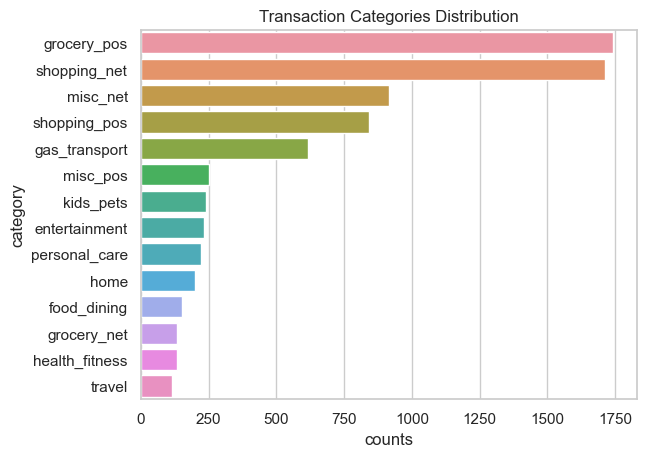

In [162]:
# Distribution of transaction categories
sns.barplot(y='category', data=fraud_by_product,x = 'counts' )
plt.title('Transaction Categories Distribution')
plt.show()

### 10. Gender Ratio of People Who Are Fraudulent

Analyze the gender distribution among fraudulent transactions.

In [88]:
gender_fraud_stats = df[df['is_fraud'] == 1]['gender'].value_counts(normalize=True) * 100
print(gender_fraud_stats)


M    50.239808
F    49.760192
Name: gender, dtype: float64


### 11. Distribution of Frauds by Product and Transaction Amounts

Compare fraud distribution across different products and transaction amounts.

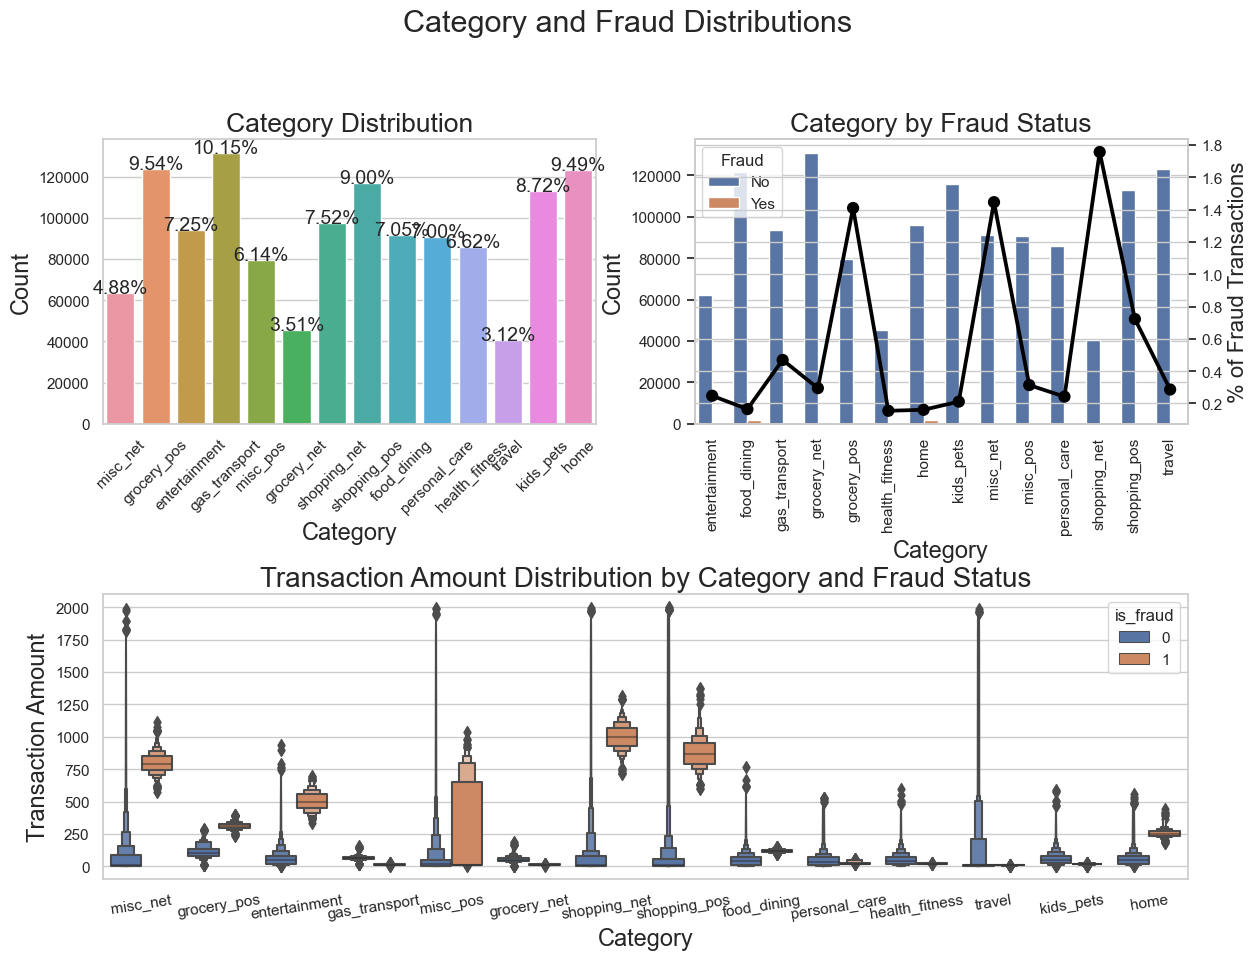

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab for fraud percentages by category
tmp = pd.crosstab(df['category'], df['is_fraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

# Set up figure size and title
plt.figure(figsize=(14, 10))
plt.suptitle('Category and Fraud Distributions', fontsize=22)

# Subplot 1: Count of transactions by category
plt.subplot(221)
g = sns.countplot(x='category', data=df)
g.set_title("Category Distribution", fontsize=19)
g.set_xlabel("Category", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
total = len(df)  # total number of transactions

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
           '{:1.2f}%'.format(height / total * 100),
           ha="center", fontsize=14)

# Subplot 2: Count of fraud and non-fraud transactions by category
plt.subplot(222)
g1 = sns.countplot(x='category', hue='is_fraud', data=df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
g1.set_title("Category by Fraud Status", fontsize=19)
g1.set_xlabel("Category", fontsize=17)
g1.set_ylabel("Count", fontsize=17)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)

# Add point plot to show fraud percentages
gt = g1.twinx()
sns.pointplot(x='category', y='Fraud', data=tmp, color='black', order=tmp['category'])
gt.set_ylabel("% of Fraud Transactions", fontsize=16)

# Subplot 3: Box plot of transaction amounts by category and fraud status
plt.subplot(212)
g3 = sns.boxenplot(x='category', y='amt', hue='is_fraud', data=df[df['amt'] <= 2000])
g3.set_title("Transaction Amount Distribution by Category and Fraud Status", fontsize=20)
g3.set_xlabel("Category", fontsize=17)
g3.set_ylabel("Transaction Amount", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(), rotation=9)

# Adjust the layout
plt.subplots_adjust(hspace=0.6, top=0.85)

# Show the plot
plt.show()


### 12. Number of People with Fraud on a Specific Day

Calculate how many individuals experience fraud per day.

fraud rate per 100 people=(total transactions per day / fraud transactions per day​)×100

In [96]:
daily_fraud_per_person = df[df['is_fraud'] == 1].groupby(['cc_num', pd.to_datetime(df['trans_date_trans_time']).dt.date]).size()
print(daily_fraud_per_person)


cc_num               trans_date_trans_time
60416207185          2019-03-01               3
                     2019-03-02               6
60422928733          2019-04-17               6
                     2019-04-18               6
60423098130          2019-03-14               7
                                             ..
4973530368125489546  2019-08-31               6
4980323467523543940  2020-04-16               2
                     2020-04-17               8
4992346398065154184  2019-10-31               4
                     2019-11-01               4
Length: 1499, dtype: int64


In [134]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = df['trans_date_trans_time'].dt.date

# Group by state and date, count transactions and unique customers
grouped_data = df[df['is_fraud'] == 1].groupby(['state', 'trans_date']).agg(
    transactions=('cc_num', 'count'),
    unique_customers=('cc_num', 'nunique')
).reset_index()

# Calculate fraud rate per 10 people
grouped_data['fraud_rate_per_10'] = (grouped_data['transactions'] / grouped_data['unique_customers']) * 10

average_fraud_rate = grouped_data.groupby('state')['fraud_rate_per_10'].mean()


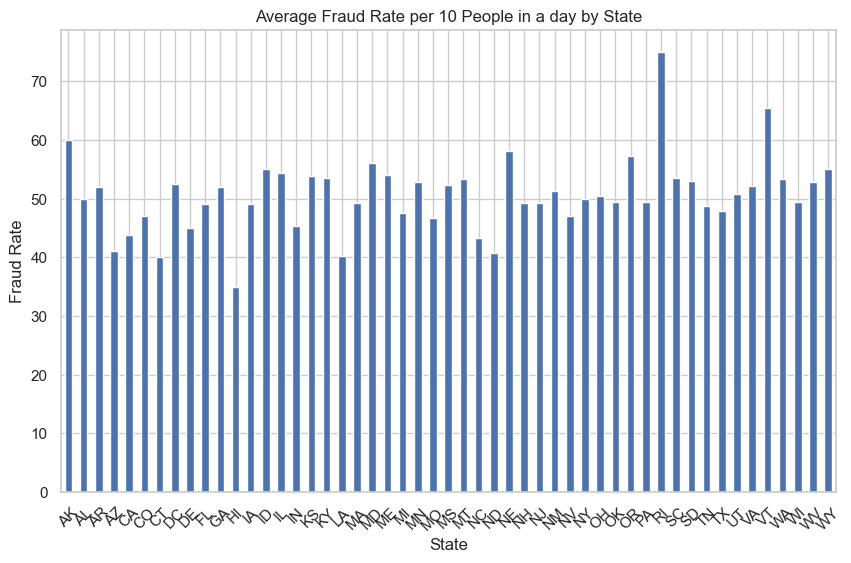

In [104]:

plt.figure(figsize=(10, 6))
average_fraud_rate.plot(kind='bar')
plt.title('Average Fraud Rate per 10 People in a day by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 13. Average Fraud Occurrence per Hour, Day, and Month

Calculate the average number of frauds per hour, day, and month.

In [108]:
avg_frauds_per_hour = df[df['is_fraud'] == 1].groupby('hour').size().mean()
avg_frauds_per_day = df[df['is_fraud'] == 1].groupby(pd.to_datetime(df['trans_date_trans_time']).dt.date).size().mean()
avg_frauds_per_month = df[df['is_fraud'] == 1].groupby('month').size().mean()

print(f"Avg frauds per hour: {avg_frauds_per_hour}")
print(f"Avg frauds per day: {avg_frauds_per_day}")
print(f"Avg frauds per month: {avg_frauds_per_month}")


Avg frauds per hour: 312.75
Avg frauds per day: 14.892857142857142
Avg frauds per month: 625.5


### 14. City and Street Relationship in Terms of Fraud

Analyze fraud distribution by city and street.

In [109]:
fraud_by_city = df[df['is_fraud'] == 1]['city'].value_counts()
fraud_by_street = df[df['is_fraud'] == 1]['street'].value_counts()
print(fraud_by_city)
print(fraud_by_street)


Houston           39
Warren            33
Huntsville        29
Naples            29
Dallas            27
                  ..
Florence           3
Kilgore            2
Phoenix            2
Phenix City        2
Denham Springs     2
Name: city, Length: 702, dtype: int64
5205 Annette Islands Apt. 043     19
15315 Vaughn Park Suite 356       19
0374 Courtney Islands Apt. 400    18
474 Allen Haven                   16
537 Rice Square Suite 040         16
                                  ..
670 Le Meadows Suite 250           2
686 Linda Rest                     2
594 Berry Lights Apt. 392          2
312 Eric Expressway Apt. 014       2
458 Phillips Island Apt. 768       2
Name: street, Length: 762, dtype: int64


### 15. Analysis Based on Credit Card Types

Analyze how fraud varies across different credit card types.

In [112]:
fraud_by_card_type = df[df['is_fraud'] == 1]['card_type'].value_counts()
print(fraud_by_card_type)


American Express    2680
Visa                2441
Mastercard          1118
Regional Card       1013
Maestro Card         254
Name: card_type, dtype: int64


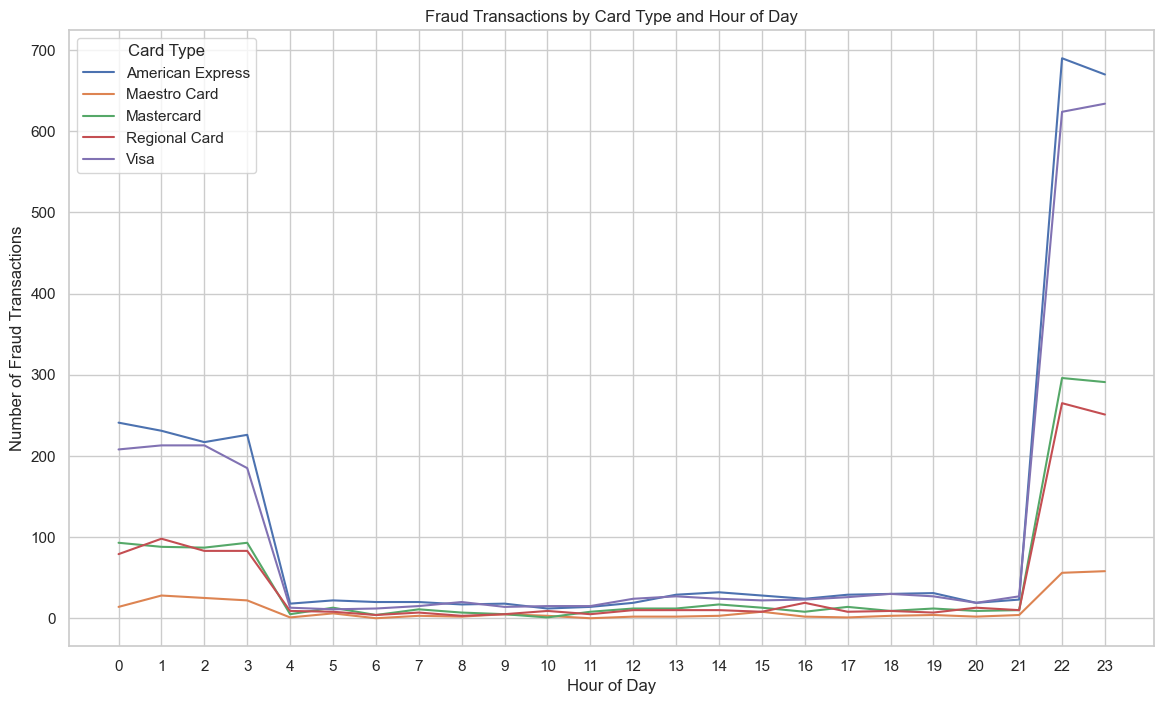

In [116]:
# Filter fraud transactions
fraud_data = df[df['is_fraud'] == 1]

# Group by card type and hour to see the count of frauds at each hour for each card type
fraud_by_card_type_time = fraud_data.groupby(['card_type', 'hour']).size().unstack().fillna(0)

# Visualize the fraud transactions by card type over time
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

for card in fraud_by_card_type_time.index:
    plt.plot(fraud_by_card_type_time.columns, fraud_by_card_type_time.loc[card], label=card)

plt.title('Fraud Transactions by Card Type and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.legend(title='Card Type')
plt.xticks(ticks=range(24), labels=range(24))  # Ensure x-axis represents 0 to 23 hours
plt.grid(True)
plt.show()


### CONCLUSION

- AMERICAN EXPRESS and VISA card are highly used for frauds during peak hours in a da.
- Maestro Card is used less for frauds. 

#### Geographic Distribution of Fraud by Card Type (city, state, lat, long)

-    Question: Are certain geographic regions more prone to fraud for certain card types?
-    Analysis: Plot fraud occurrences on a map, using lat and long, and segment by card_type. You can also analyze it at a state level using the state feature.
-    Insight: This can reveal regional vulnerabilities or targeted areas for fraud for specific card types.

In [119]:
fraud_by_card_state = df[df['is_fraud'] == 1].groupby(['card_type', 'state']).size().unstack().fillna(0)
fraud_by_card_state

state               AK    AL    AR    AZ     CA    CO    CT    DC   DE    FL  \
card_type                                                                      
American Express  24.0  58.0  42.0  18.0  100.0  17.0  11.0   0.0  0.0  81.0   
Maestro Card       0.0  26.0   0.0   0.0   14.0   0.0   0.0   0.0  0.0   8.0   
Mastercard         0.0  17.0   0.0  10.0   20.0  18.0   5.0  21.0  0.0  54.0   
Regional Card      0.0  55.0  60.0   0.0   63.0  37.0   0.0   0.0  9.0  47.0   
Visa              12.0  59.0  59.0   9.0  129.0  41.0   0.0   0.0  0.0  91.0   

state             ...    SD    TN     TX    UT    VA    VT    WA    WI    WV  \
card_type         ...                                                          
American Express  ...  31.0  44.0  252.0  32.0  93.0  26.0  38.0  57.0  64.0   
Maestro Card      ...   0.0   0.0   15.0   0.0   0.0   0.0  10.0  34.0   0.0   
Mastercard        ...  20.0  34.0   36.0   0.0   0.0   0.0  15.0  23.0  15.0   
Regional Card     ...   0.0  21.0   54.0   0.0  29.0  21.0   7.0  12.0  40.0   
Visa              ...  23.0  41.0  122.0  29.0  76.0  25.0  26.0  37.0  27.0   

state               WY  
card_type               
American Express  21.0  
Maestro Card       0.0  
Mastercard        33.0  
Regional Card     41.0  
Visa              15.0  

[5 rows x 51 columns]

#### Transaction Categories and Fraud (category)

-    Question: Are specific transaction categories (like travel, retail, etc.) more susceptible to fraud for certain card types?
-    Analysis: Group by category and card_type to analyze if certain categories are more prone to fraud for specific cards.
-    Insight: This will help businesses understand which types of transactions need more scrutiny based on card type.

In [121]:
fraud_by_card_category = df[df['is_fraud'] == 1].groupby(['card_type', 'category']).size().unstack().fillna(0)
fraud_by_card_category

category          entertainment  food_dining  gas_transport  grocery_net  \
card_type                                                                  
American Express             85           47            236           58   
Maestro Card                 10            9             21            4   
Mastercard                   26           23            101           20   
Regional Card                35           27             70           14   
Visa                         77           45            190           38   

category          grocery_pos  health_fitness  home  kids_pets  misc_net  \
card_type                                                                  
American Express          622              40    68         90       316   
Maestro Card               62               4     6         18        30   
Mastercard                251              19    25         27       140   
Regional Card             237              24    32         29       114   
Visa                      571              46    67         75       315   

category          misc_pos  personal_care  shopping_net  shopping_pos  travel  
card_type                                                                      
American Express        94             71           597           301      55  
Maestro Card             4              8            47            27       4  
Mastercard              40             34           265           134      13  
Regional Card           37             34           236           112      12  
Visa                    75             73           568           269      32

#### Age and Transaction Patterns (age, amt)

-    Question: Do people of certain age groups make larger or more frequent fraud transactions with specific card types?
-    Analysis: Analyze the distribution of transaction amounts by age group and card type.
-   Insight: This could help detect patterns, such as whether older people or younger people are more vulnerable to fraud with certain cards.

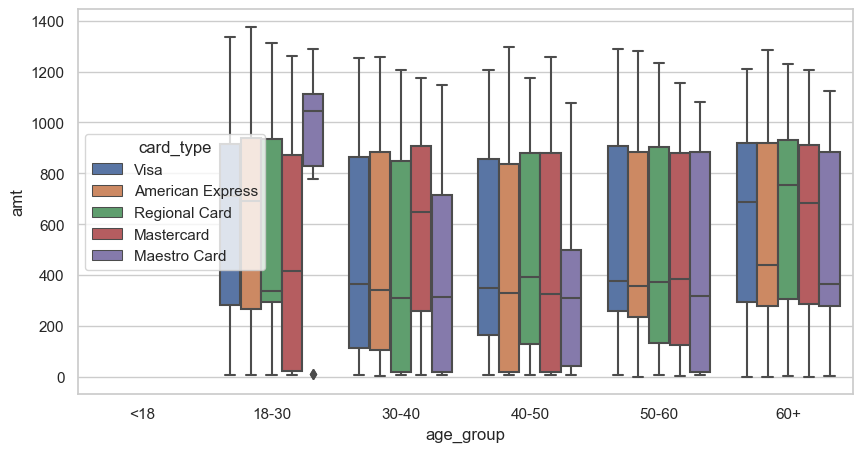

In [126]:
plt.figure(figsize=(10,5))
sns.boxplot(x='age_group', y='amt', hue='card_type', data=df[df['is_fraud'] == 1])
plt.show()

### CONCLUSION
- People under the agegroup of 18-30 use Maestro Card only for high ampunt transaction 

#### Fraud Rate by Card Type and Merchant (merchant)

-    Question: Which merchants are more frequently associated with fraud for each card type?
-    Analysis: Group fraud transactions by merchant and card_type to understand if certain merchants are targeted more for certain card types.
-    Insight: This could reveal specific vulnerabilities in merchant-card type combinations.

In [127]:
fraud_by_card_merchant = df[df['is_fraud'] == 1].groupby(['card_type', 'merchant']).size().unstack().fillna(0)
fraud_by_card_merchant

merchant          fraud_Abbott-Rogahn  fraud_Abbott-Steuber  \
card_type                                                     
American Express                  2.0                   1.0   
Maestro Card                      0.0                   0.0   
Mastercard                        0.0                   1.0   
Regional Card                     0.0                   2.0   
Visa                              1.0                   2.0   

merchant          fraud_Abernathy and Sons  fraud_Abshire PLC  \
card_type                                                       
American Express                       1.0                2.0   
Maestro Card                           1.0                0.0   
Mastercard                             1.0                3.0   
Regional Card                          1.0                0.0   
Visa                                   0.0                4.0   

merchant          fraud_Adams, Kovacek and Kuhlman  fraud_Adams-Barrows  \
card_type                                                                 
American Express                               3.0                  1.0   
Maestro Card                                   0.0                  0.0   
Mastercard                                     0.0                  0.0   
Regional Card                                  0.0                  0.0   
Visa                                           1.0                  0.0   

merchant          fraud_Altenwerth, Cartwright and Koss  \
card_type                                                 
American Express                                    8.0   
Maestro Card                                        0.0   
Mastercard                                          2.0   
Regional Card                                       5.0   
Visa                                               11.0   

merchant          fraud_Altenwerth-Kilback  fraud_Ankunding LLC  \
card_type                                                         
American Express                       1.0                 10.0   
Maestro Card                           1.0                  0.0   
Mastercard                             2.0                  4.0   
Regional Card                          1.0                  7.0   
Visa                                   3.0                  9.0   

merchant          fraud_Ankunding-Carroll  ...  \
card_type                                  ...   
American Express                      1.0  ...   
Maestro Card                          0.0  ...   
Mastercard                            0.0  ...   
Regional Card                         1.0  ...   
Visa                                  2.0  ...   

merchant          fraud_Yost, Schamberger and Windler  fraud_Yost-Rogahn  \
card_type                                                                  
American Express                                  0.0                1.0   
Maestro Card                                      1.0                1.0   
Mastercard                                        1.0                3.0   
Regional Card                                     1.0                0.0   
Visa                                              3.0                2.0   

merchant          fraud_Zboncak LLC  fraud_Zboncak Ltd  \
card_type                                                
American Express                1.0                2.0   
Maestro Card                    0.0                0.0   
Mastercard                      0.0                0.0   
Regional Card                   1.0                1.0   
Visa                            1.0                0.0   

merchant          fraud_Zboncak, Rowe and Murazik  fraud_Zemlak Group  \
card_type                                                               
American Express                             10.0                 5.0   
Maestro Card                                  0.0                 0.0   
Mastercard                                    9.0                 5.0   
Regional Card                       

C:\Users\goura\AppData\Local\Temp\ipykernel_72532\1286885143.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = fraud_percentage_by_merchant.pivot('merchant', 'card_type', 'fraud_percentage')


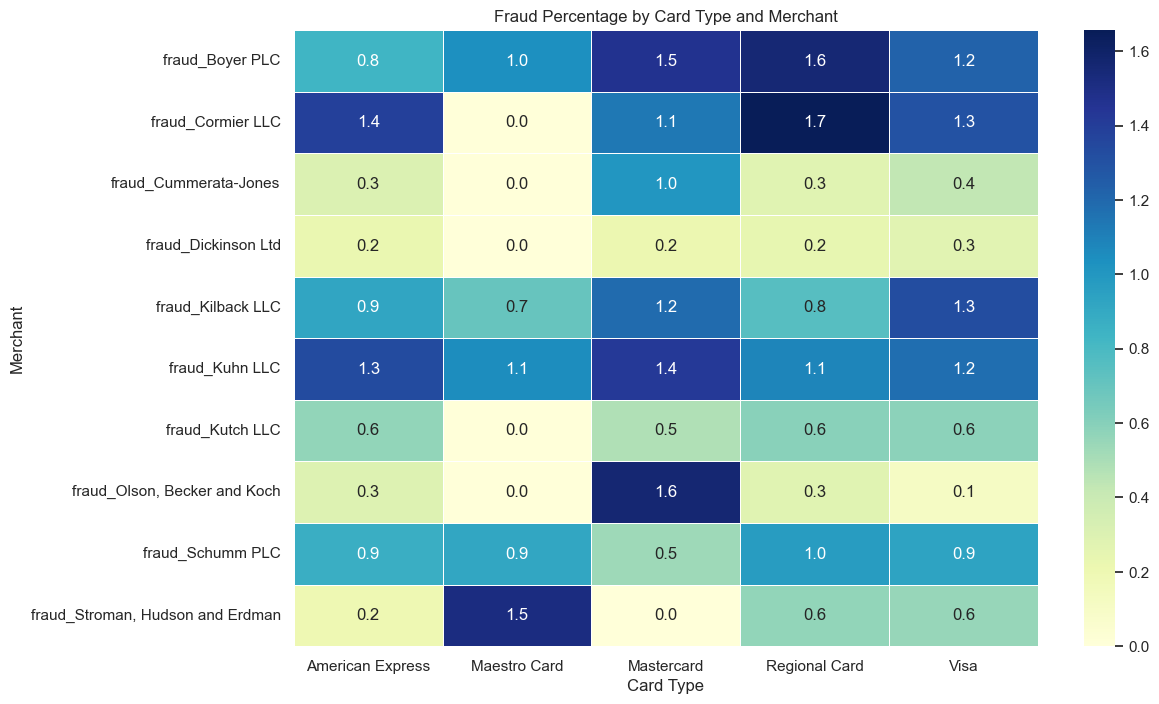

In [129]:
# Filter to top 10 merchants
top_10_merchants = df['merchant'].value_counts().nlargest(10).index
filtered_data = df[df['merchant'].isin(top_10_merchants)]

# Calculate fraud percentage by card type and merchant
fraud_percentage_by_merchant = filtered_data.groupby(['merchant', 'card_type']).agg(
    total_transactions=('is_fraud', 'size'),
    total_frauds=('is_fraud', 'sum')
).reset_index()
fraud_percentage_by_merchant['fraud_percentage'] = (fraud_percentage_by_merchant['total_frauds'] / fraud_percentage_by_merchant['total_transactions']) * 100

# Pivot for heatmap
heatmap_data = fraud_percentage_by_merchant.pivot('merchant', 'card_type', 'fraud_percentage')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Fraud Percentage by Card Type and Merchant')
plt.xlabel('Card Type')
plt.ylabel('Merchant')
plt.show()


### CONCLUSION
- The heatmap reveals which card types have the highest fraud percentages across the top 10 merchants, highlighting potential vulnerabilities and areas for further investigation.

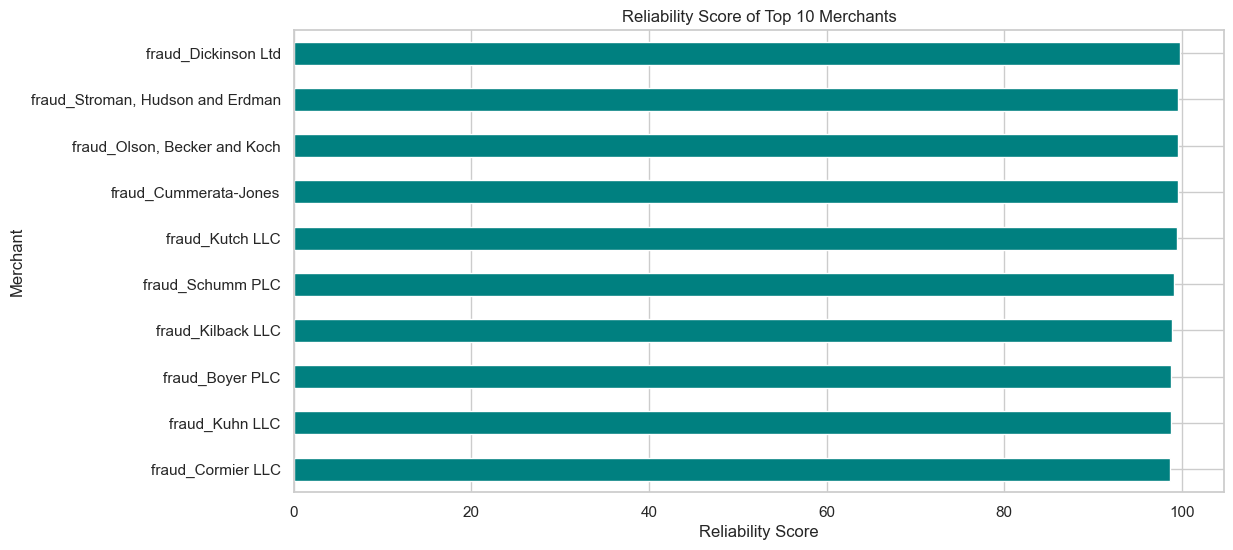

In [130]:
# Calculate statistics for top 10 merchants
merchant_stats = df[df['merchant'].isin(top_10_merchants)].groupby('merchant').agg(
    total_transactions=('is_fraud', 'size'),
    total_frauds=('is_fraud', 'sum')
)
merchant_stats['fraud_percentage'] = (merchant_stats['total_frauds'] / merchant_stats['total_transactions']) * 100
merchant_stats['reliability_score'] = 100 - merchant_stats['fraud_percentage']

# Plot reliability score
plt.figure(figsize=(12, 6))
merchant_stats['reliability_score'].sort_values().plot(kind='barh', color='teal')
plt.title('Reliability Score of Top 10 Merchants')
plt.xlabel('Reliability Score')
plt.ylabel('Merchant')
plt.show()


### CONCLUSION 

- reliablity score of to 10 merchants which are likely to more trustwothy.

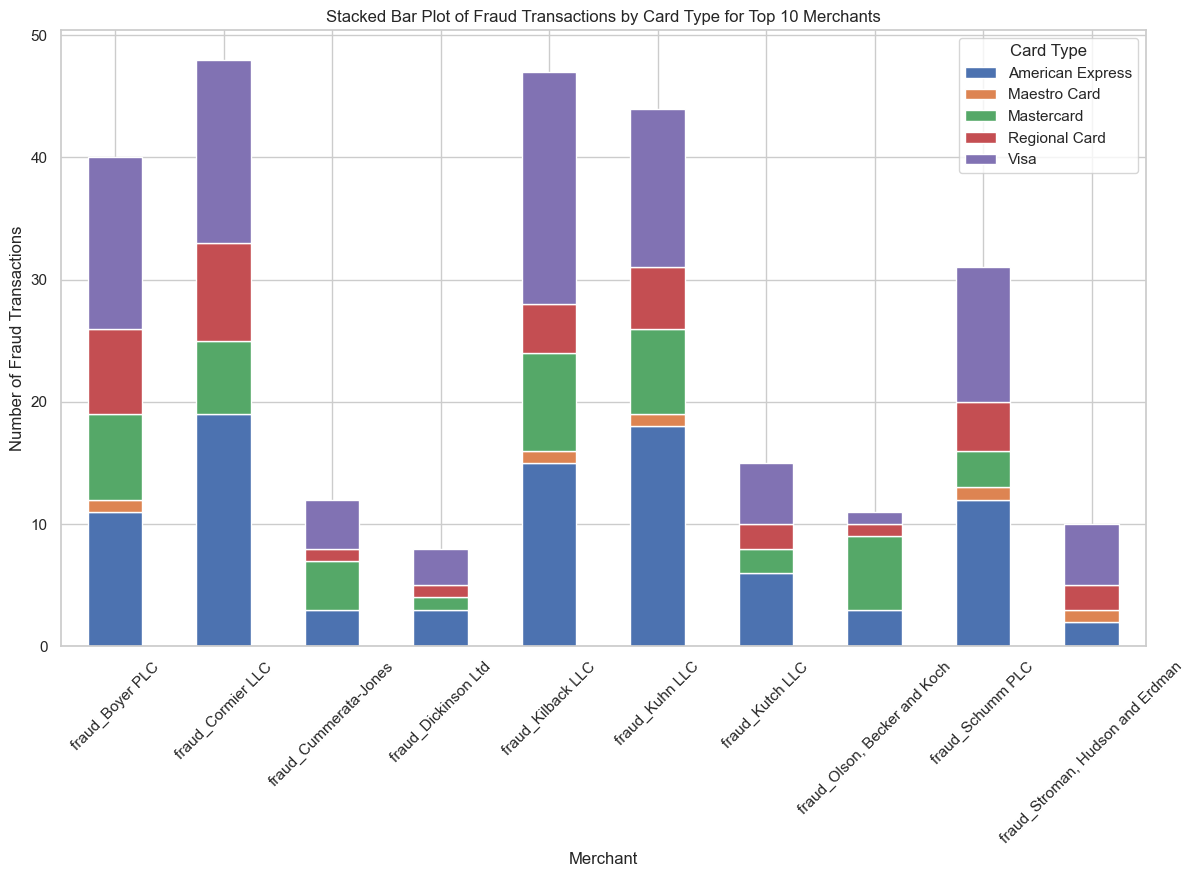

In [170]:
# Calculate fraud transactions by card type and merchant
fraud_transactions_by_merchant = filtered_data[filtered_data['is_fraud'] == 1].groupby(['merchant', 'card_type']).size().unstack().fillna(0)

# Plot stacked bar plot
ax = fraud_transactions_by_merchant.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Stacked Bar Plot of Fraud Transactions by Card Type for Top 10 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraud Transactions')
plt.legend(title='Card Type')
plt.xticks(rotation=45)
plt.show()


### CONCLUSION 

- here we can identify the maximum number of fraud transctions are done using American Express and Visa cards by the top 10 merchants.


#### analyze the total amount spent by different card types across various states in the USA

- Question: How can we visualize and analyze the total amount spent by different card types across various states in the USA?

- Analysis: A choropleth map can be used to show the total amount spent by each card type across states, with a detailed hover template for comparing spending amounts.

- Insights: The map reveals regional spending patterns for different card types, allowing comparison of card usage across states and identification of economic behaviors, which can inform targeted marketing strategies and financial adjustments.

In [163]:
if 'card_type' not in df.columns:
    raise ValueError("The 'card_type' column is missing from the dataset.")

# Aggregate total amount spent by each card type per state
amount_by_card_state = df.groupby(['state', 'card_type']).agg(
    total_amount=('amt', 'sum')
).reset_index()

# Pivot the data for visualization
pivot_table = amount_by_card_state.pivot(index='state', columns='card_type', values='total_amount').fillna(0)

# Prepare custom data for hovertemplate
customdata = pivot_table.reset_index().to_dict(orient='records')

# Create the choropleth map
fig = px.choropleth(
    pivot_table.reset_index(),
    locations='state',
    locationmode="USA-states",
    color=pivot_table.columns[0],  # Default to the first card type for initial color
    hover_name='state',
    color_continuous_scale='burg',
    scope="usa",
    title="Total Amount Spent by Card Type by State"
)

# Generate hover template with placeholders for each card type
hover_template = "<b>%{hovertext}</b><br>"
for card_type in pivot_table.columns:
    idx = list(pivot_table.columns).index(card_type)
    hover_template += f"Total Amount Using {card_type}: $%{{customdata[{idx}]:,.2f}}<br>"

# Customize the hover template
fig.update_traces(
    hovertemplate=hover_template + "<extra></extra>",
    customdata=[list(row.values())[1:] for row in customdata]  # Exclude the 'state' column for customdata
)

# Display the map
fig.show()

### CONCLUSION 

- As we hover over the map we can see the total amount used by different creditcards across all the states.
- NY and TX has the highest amount used by all American Express card, follwed by Visa card.
- States such as UT, NV, ID do not use Maestro Card at all.

There NY and TX are highly prone to transaction fraudlant.

![MAP IMAGE](map.png)

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract numerical features and target variable
numerical_features = [
    'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
    'merch_long', 'year', 'month', 'day', 'hour', 'time_diff', 'is_peak_hour',
    'distance', 'z_score', 'log_amt', 'age','is_fraud'
]

X = df[numerical_features]
y = df['is_fraud']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Feature Selection

<Axes: >

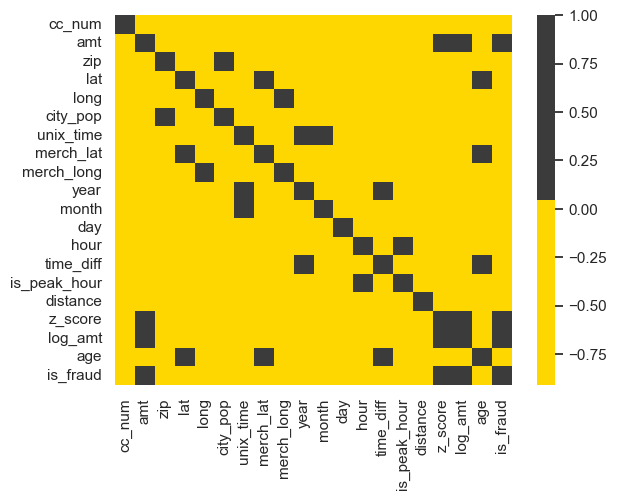

In [187]:
data = df[numerical_features]
sns.heatmap(df[numerical_features].corr(),cmap = colors,cbar = True)

- There are too many features in the dataset and it is difficult to understand anything.
- Hence, we will plot the correlation map only with the target variable.

C:\Users\goura\AppData\Local\Temp\ipykernel_72532\2290779651.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



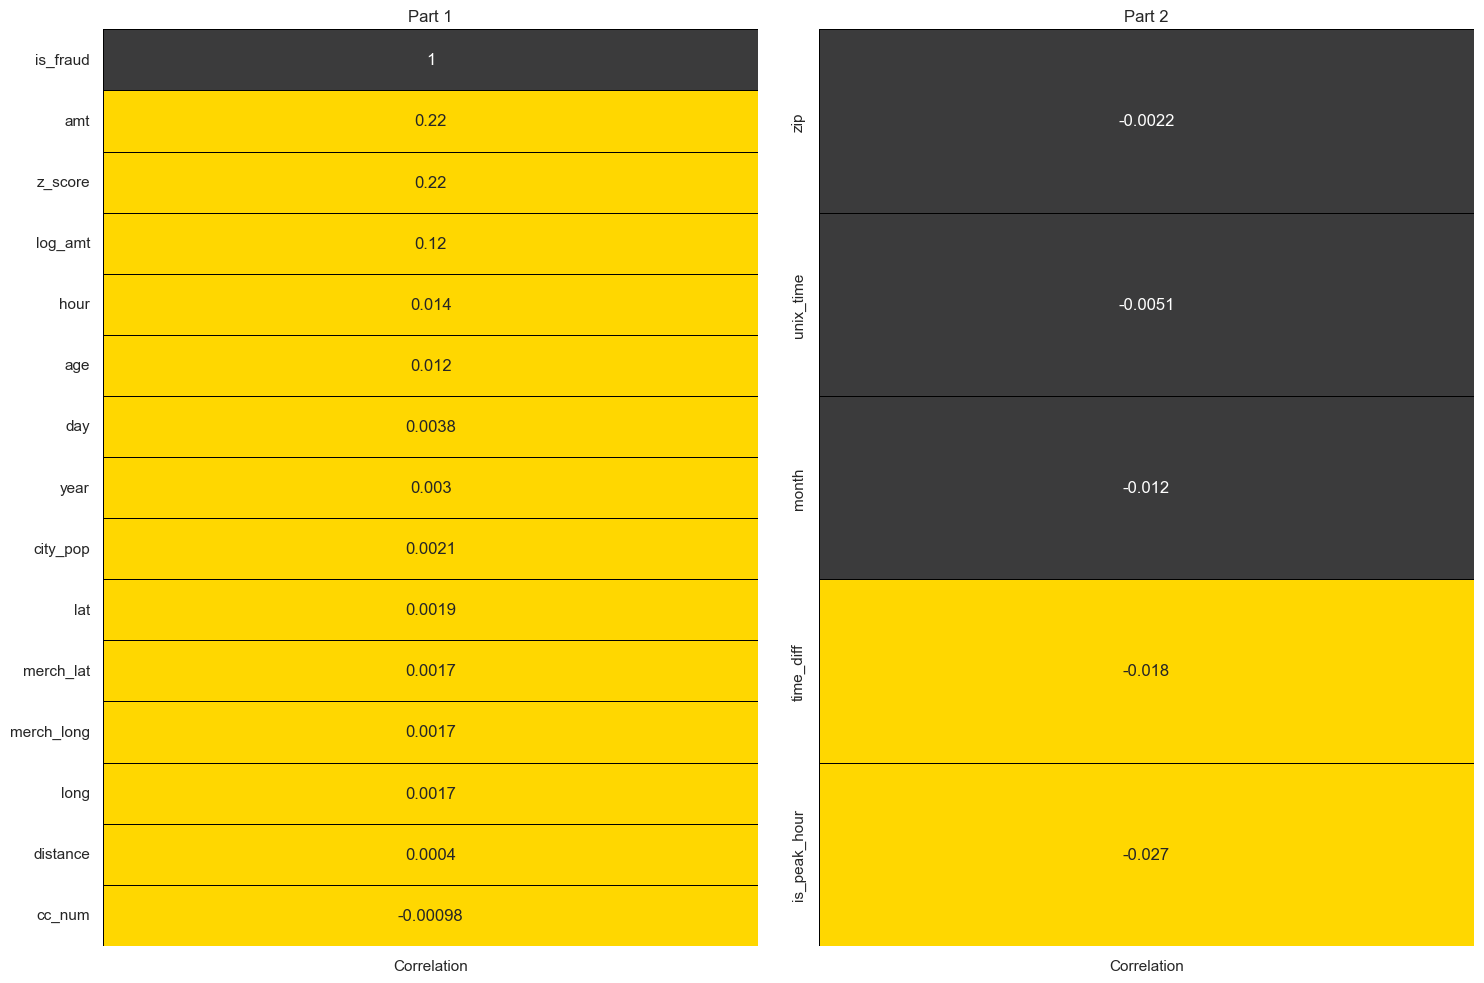

In [188]:
# Prepare the data by computing the correlation with the target variable
corr = df.corrwith(df['is_fraud']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']

# Define color map
colors = colors  # You can change this to any other colormap if needed

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plot the first part of the heatmap
plt.subplot(1, 2, 1)
sns.heatmap(corr.iloc[:15, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 1')

# Plot the second part of the heatmap
plt.subplot(1, 2, 2)
sns.heatmap(corr.iloc[15:30], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 2')

# Adjust layout
fig.tight_layout(w_pad=2)

# Display the plot
plt.show()

- For feature selection, we will exclude the features having correlation values between [-0.1,0.1].

In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

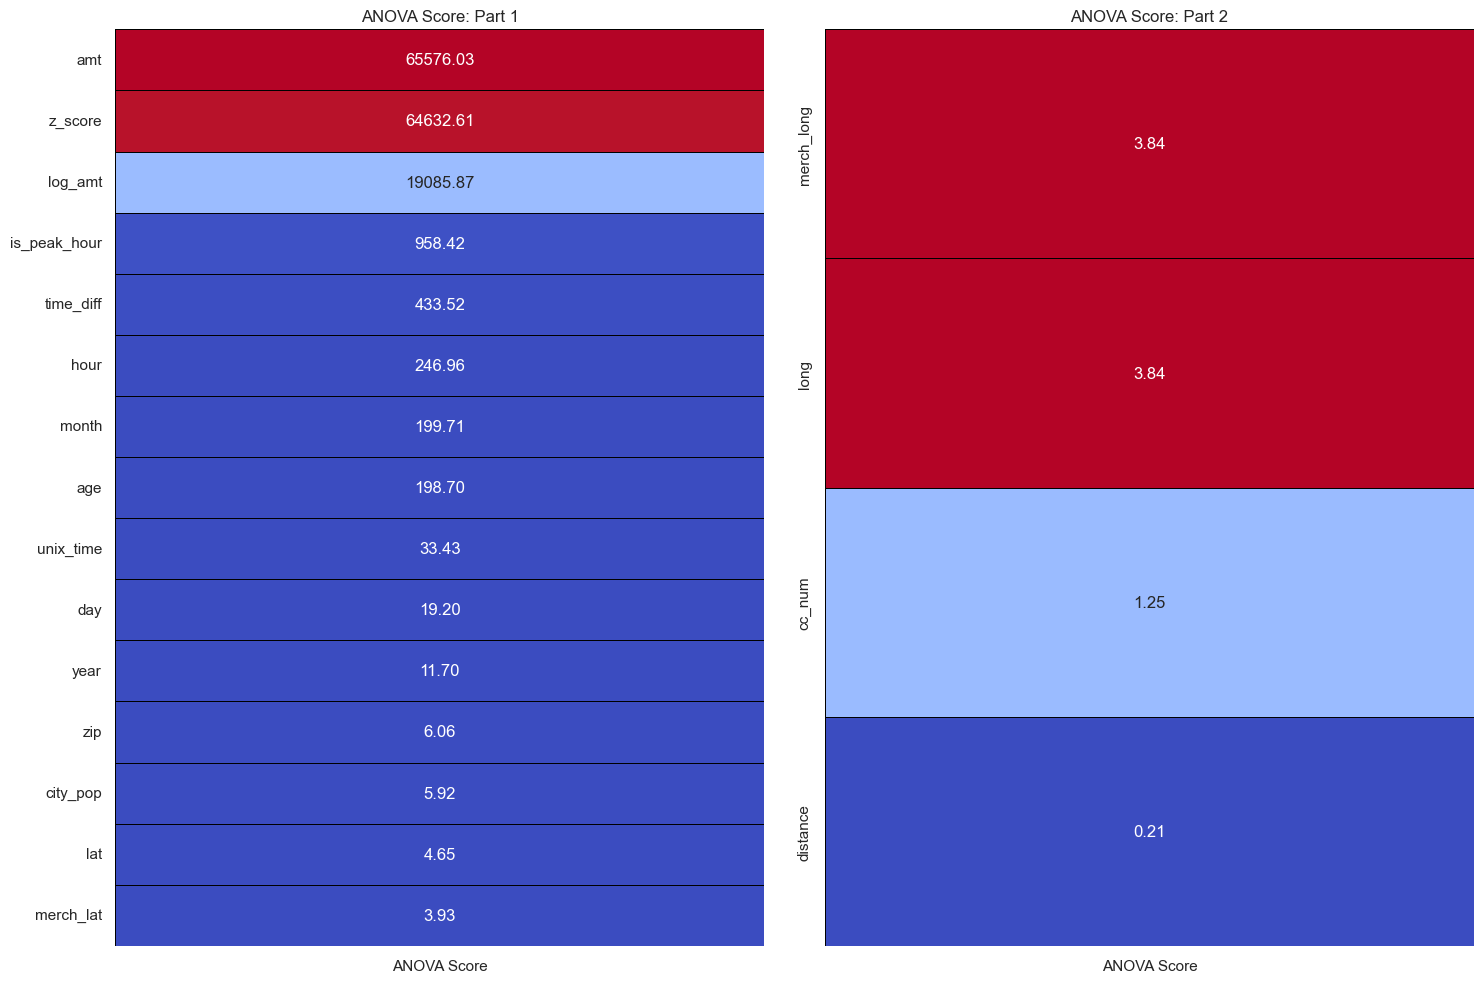

In [189]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and it's already loaded

# Define features and target
features = data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
                  'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 
                  'time_diff', 'is_peak_hour', 'distance', 'z_score', 'log_amt', 'age']]
target = data['is_fraud']

# Normalize features (optional but often useful for feature selection)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform ANOVA feature selection
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features_scaled, target)

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['ANOVA Score'])
feature_scores = feature_scores.sort_values(by='ANOVA Score', ascending=False)

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Define color map
colors = 'coolwarm'

# First heatmap (Part 1)
plt.subplot(1, 2, 1)
sns.heatmap(feature_scores.iloc[:15, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score: Part 1')

# Second heatmap (Part 2)
plt.subplot(1, 2, 2)
sns.heatmap(feature_scores.iloc[15:30, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA Score: Part 2')

fig.tight_layout(w_pad=2)
plt.show()

- Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the Correlation Plot & ANOVA Score.

## Data Balancing

In order to cope with unbalanced data, there are 2 options :

- Undersampling : Trim down the majority samples of the target variable.
- Oversampling : Increase the minority samples of the target variable to the majority samples.
- For best performances, we will use the combination of undersampling and oversampling.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use imblearn.


In [165]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [192]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Define the under-sampling and over-sampling methods
under_sampler = RandomUnderSampler(random_state=42)
over_sampler = SMOTE(random_state=42)

# Create a pipeline with the under-sampling and over-sampling methods
pipeline = Pipeline([
    ('under', under_sampler),
    ('over', over_sampler)
])

# Apply the pipeline to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Print the class distribution before and after sampling
print("Original training set class distribution:")
print(y_train.value_counts())

print("\nResampled training set class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Original training set class distribution:
0    902451
1      5221
Name: is_fraud, dtype: int64

Resampled training set class distribution:
0    5221
1    5221
Name: is_fraud, dtype: int64


In [193]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\goura\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning:

[07:21:34] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    386718
           1       0.11      0.96      0.20      2285

    accuracy                           0.95    389003
   macro avg       0.56      0.96      0.59    389003
weighted avg       0.99      0.95      0.97    389003

Confusion Matrix:
[[369293  17425]
 [    94   2191]]


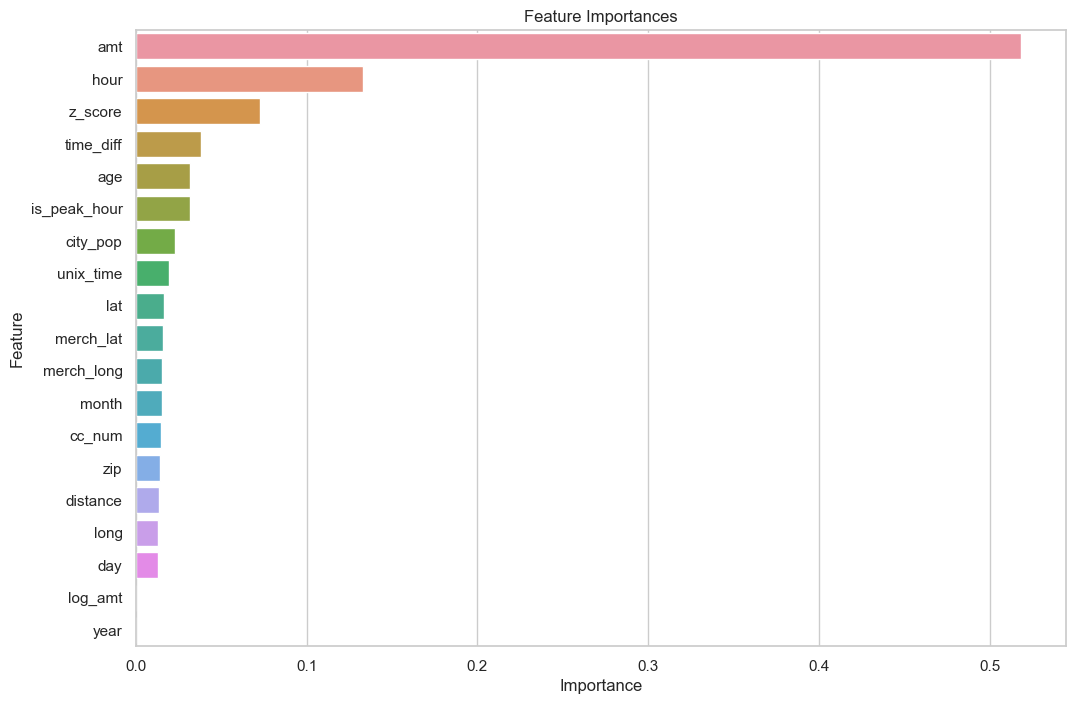

In [194]:


# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


In [196]:
from sklearn.model_selection import GridSearchCV

# Define the model without the deprecated parameter
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1)

# Fit grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report with Best Model:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Classification Report with Best Model:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    386718
           1       0.11      0.96      0.20      2285

    accuracy                           0.95    389003
   macro avg       0.55      0.96      0.59    389003
weighted avg       0.99      0.95      0.97    389003

Confusion Matrix:
[[368974  17744]
 [    96   2189]]


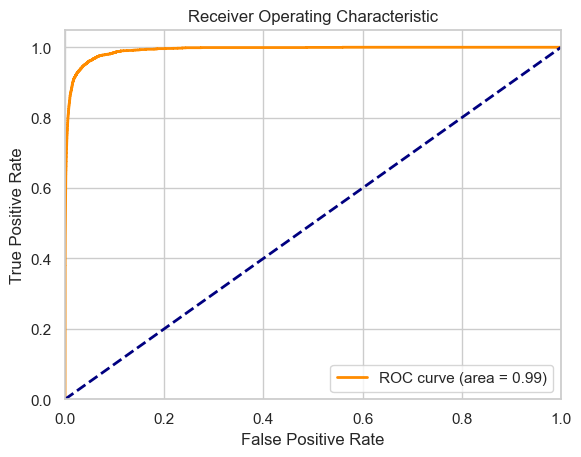

In [197]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# ROC Curve and AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [221]:
test_data = pd.read_csv('fraudTest.csv')

In [222]:
test_data['card_type'] = test_data['cc_num'].apply(get_card_type)
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['year'] = test_data['trans_date_trans_time'].dt.year
test_data['month'] = test_data['trans_date_trans_time'].dt.month
test_data['day'] = test_data['trans_date_trans_time'].dt.day
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['z_score'] = np.abs(stats.zscore(df['amt']))
test_data['log_amt'] = np.log(test_data['amt'] + 1)
test_data['dob'] = pd.to_datetime(df['dob'])
test_data['hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
test_data['age'] = pd.to_datetime('today').year - test_data['dob'].dt.year
test_data['year'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.year
test_data['month'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.month

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date'] = df['trans_date_trans_time'].dt.date

training_features = [
    'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
    'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour',
    'time_diff', 'is_peak_hour', 'distance', 'z_score', 'log_amt', 'age','is_fraud'
]

# Add missing features to the test data with default values
for feature in training_features:
    if feature not in test_data.columns:
        test_data[feature] = np.nan
        
test_data.fillna({
    'time_diff': 0,
    'distance': 0,
    'is_peak_hour': 0
}, inplace=True)

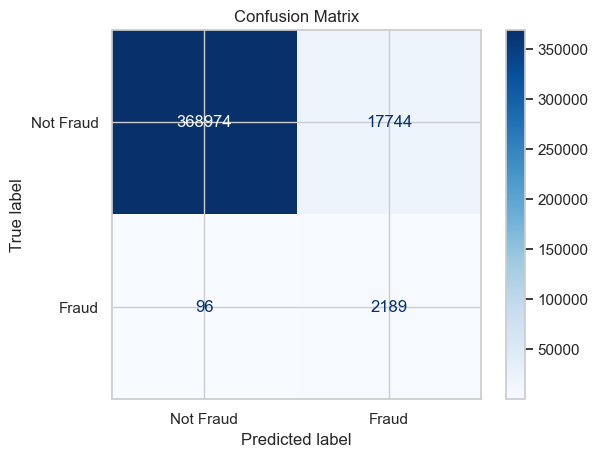

In [207]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()